# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [1]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [2]:
DATASET_PATH = 'college_student_placement_dataset.csv'
RANDOM_STATE = 45

## Preliminary Inspection

See what the raw file looks like!

In [3]:
# Look at the first 5 lines of theraw contents of the file first.

with open(DATASET_PATH, 'r') as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break # Stop; there are less than 5 lines.


College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [4]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [5]:
# Identify which columns have null values. 

df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## Duplicate Rows Check
If so, remove the duplicates.

In [6]:
# Check to see if our data has any duplicate rows.

n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 0.


Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [7]:
# Check categorical columns

print("Internship_Experience categories:")
print(df['Internship_Experience'].value_counts())
print("\nPlacement categories:")
print(df['Placement'].value_counts())

Internship_Experience categories:
Internship_Experience
No     6036
Yes    3964
Name: count, dtype: int64

Placement categories:
Placement
No     8341
Yes    1659
Name: count, dtype: int64


## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [8]:
# Convert 'Yes'/'No' to 1/0 for Internship_Experience and Placement

df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})

df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,0,1,8,0,1
9996,CLG0098,70,9.25,9.34,7,0,0,7,2,0
9997,CLG0066,89,6.08,6.25,3,1,3,9,5,0
9998,CLG0045,107,8.77,8.92,3,0,7,5,1,0


❔ When should you use this versus using `pd.get_dummies`?

# Visualization with `sns.pairplot`

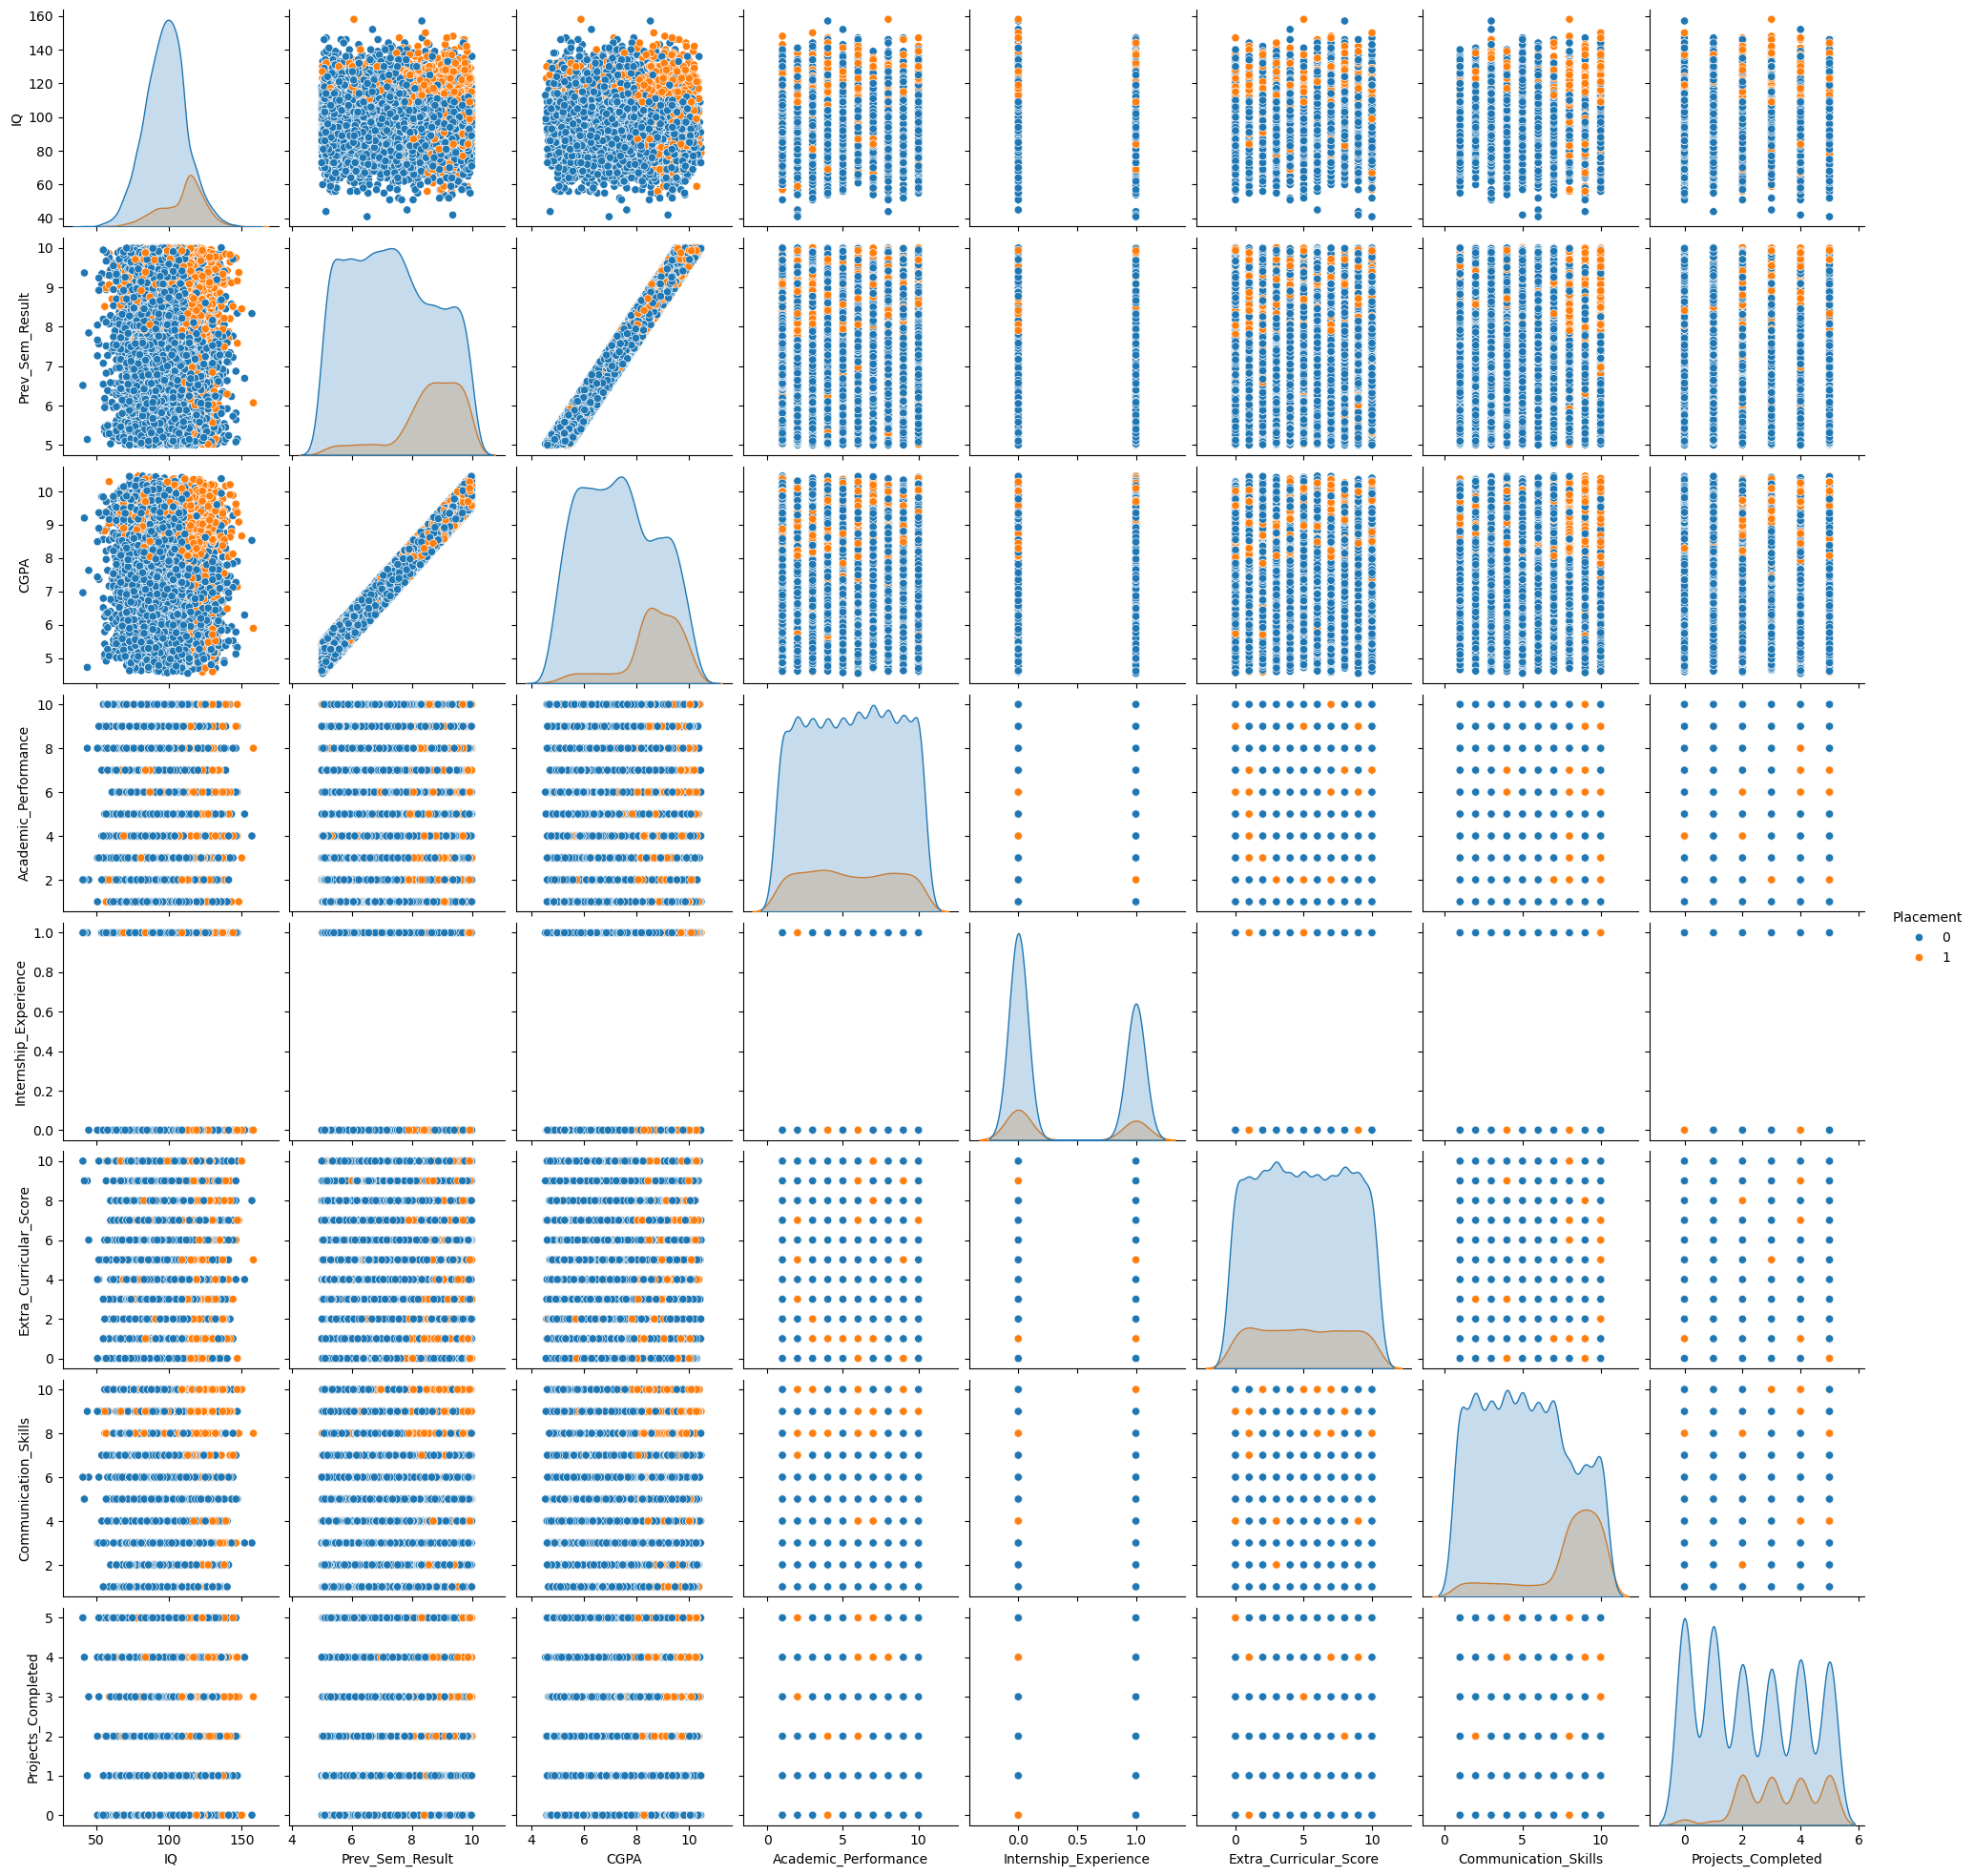

In [9]:
# Use sns.pairplot to visualize.

sns.pairplot(df, hue='Placement')
plt.show()

## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [10]:
# Set X to the desired features.
X = df[['IQ', 'Internship_Experience']]

# Set y to be our target variable. 
y = df['Placement']

## Split to Testing and Training Datasets 

In [11]:
# Split our data into testing and training pairs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Print the length and width of our testing data.
print('X_train: %d rows, %d columns' % X_train.shape)
print('X_test: %d rows, %d columns' % X_test.shape)
print('y_train: %d rows, 1 column' % y_train.shape)
print('y_test: %d rows, 1 column' % y_test.shape)

X_train: 8000 rows, 2 columns
X_test: 2000 rows, 2 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [12]:
# Initialize our logistic regression model.
model = LogisticRegression()

# Fit-train our model using our training data.
model.fit(X_train, y_train)

LogisticRegression()

## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [13]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [14]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.

print("Accuracy Score: %f" % accuracy_score(y_test, y_pred))
print("Precision Score: %f" % precision_score(y_test, y_pred))
print("Recall Score: %f" % recall_score(y_test, y_pred))
print('F1 Score: %f' % f1_score(y_test, y_pred))

Accuracy Score: 0.829000
Precision Score: 0.333333
Recall Score: 0.030120
F1 Score: 0.055249


Plot a confusion matrix of your predicted results.

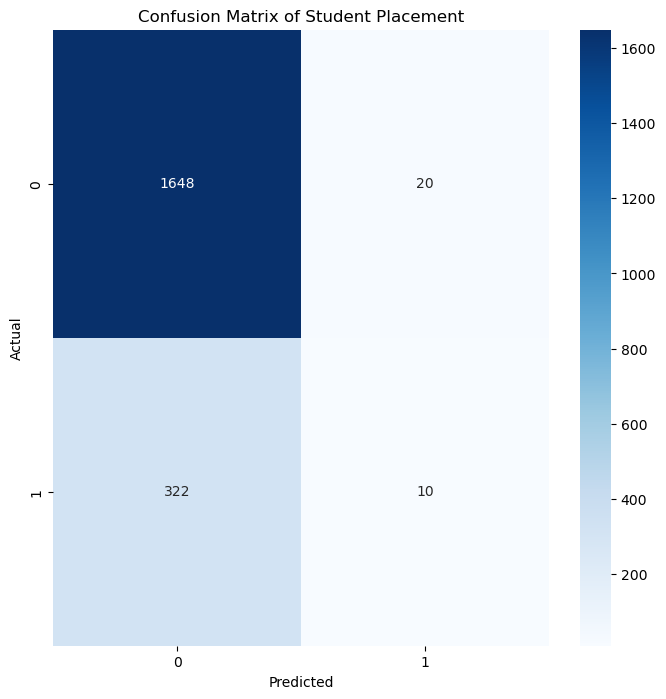

In [15]:
# 3. Plot a confusion matrix of your predicted results.

cm = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Student Placement")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

How many true positives and true negatives did your model get?

In [16]:
# How many true positives and true negatives did your model get?

true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 1648
True Positives: 10


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [17]:
# Add a constant term to the independent variables.
X_train_sm = sm.add_constant(X_train)

# Fit the model.
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary and interpret the results.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.407045
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Placement   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Oct 2025   Pseudo R-squ.:                 0.09402
Time:                        16:23:43   Log-Likelihood:                -3256.4
converged:                       True   LL-Null:                       -3594.3
Covariance Type:            nonrobust   LLR p-value:                1.750e-147
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.3832      0.250    -29.481      0.000      -7.874      -6.

# Extra Credit: Use your brain and make a better model (as in better scores).



In [ ]:
# Define the new X variable, and reuse the same y variable from before.


# Split our data into testing and training. Remember to use the same random state as you used before


# Initalize our model.


# Fit-train our model using our training data.


# Make new predicitions using our testing data. 


# Print each of our scores to inspect performance.


# Plot the confusion matrix.
